# Whether the Attendance Percentage in Formal Education and Unemployment Rate of the Household are affected by COVID - 19 and Whether the Attendance and Unemployment have Correlationship during COVID - 19 in Texas?

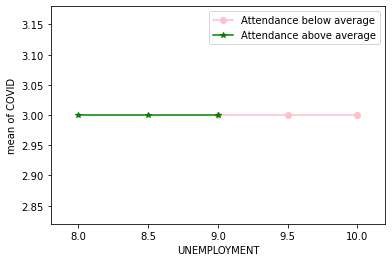

In [12]:
import math
import random
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt


#It is my prediction
df_ = pd.read_csv("Prediction.csv")
data = "Prediction.csv"
np.genfromtxt(data, delimiter = ",")
df_.rename(columns={'nan':"dat"})

a = np.array(df_["AttendancePercent"])
u = np.array(df_["Unemployment"])
c = np.array(df_["CovidTotalCountyCases"])
#Distinguish the attendacne percentage below and above average due to high attendance.
df_['Group'] = df_['AttendancePercent'] >= np.mean(a)
a_ = np.array(df_["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = c
x_ = a_
x_1 = u
x_2 = x_*x_1

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x_ + b*x_1 + c*x_2
for m in np.arange(0, 17, .05):
    predicted_y = a*x_ + b*x_1 + c*x_2
    err = predicted_y - y
    SSE = np.sum( err**2 )


# Interaction Plot with the unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(u, a_, c, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in FortWorthArlington County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


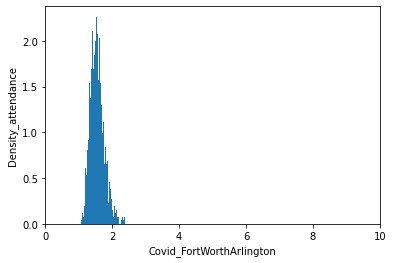

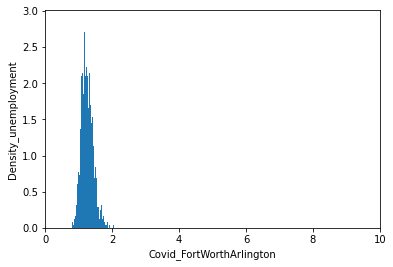

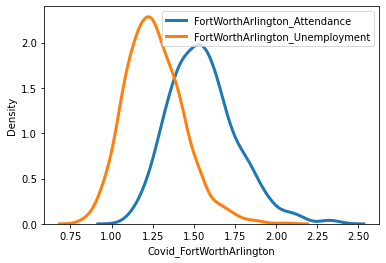

In [1]:
#Read and make arrays of the data in Fort Worth Arlington County.
df = pd.read_csv("DallasFortWorthArlington.csv")
data = "DallasFortWorthArlington.csv"
np.genfromtxt(data, delimiter = ",")
df.rename(columns={'nan':"dat"})

A = np.array(df["AttendancePercent"])
U = np.array(df["Unemployment"])

C = np.array(df["CovidTotalCountyCases"])

samples = np.zeros(1000)
samples1 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample1 = random.sample(list(C),30)
    sample2 = random.sample(list(A),30)
    samples[m] = (np.mean(sample2)-np.mean(sample1))/np.sqrt(((np.std(sample1,ddof=29))**2+(np.std(sample2,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample3 = random.sample(list(C),30)
    sample4 = random.sample(list(U),30)
    samples1[m] = (np.mean(sample4)-np.mean(sample3))/np.sqrt(((np.std(sample3,ddof=29))**2+(np.std(sample4,ddof=29))**2)/30)

#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_FortWorthArlington");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples1, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_FortWorthArlington");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington_Attendance')
sns.distplot(samples1, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington_Unemployment')
plt.xlabel("Covid_FortWorthArlington")
plt.legend()

In [31]:
#Solve the t value and p value
print(stats.ttest_ind(C,A))
print(stats.ttest_ind(C,U))

Ttest_indResult(statistic=-11.903199871787528, pvalue=3.7273966539526236e-22)
Ttest_indResult(statistic=-9.617035938674626, pvalue=1.2259363665375787e-16)


# How the relationship between the attendance and unemployment with COVID cases is formed in FortWorthArlington County by distingushing the average of the attendance?

Our intercept is  18.50169889423625 our slope1 1.0474870943084094 our slope2 -1.262674861061921 and our slope3 is -0.044563315991775876


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     67.29
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           7.04e-19
Time:                        09:35:54   Log-Likelihood:                -57.464
No. Observations:                  62   AIC:                             122.9
Df Residuals:                      58   BIC:                             131.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.5017      1.882      9.832      0.000      14.735      22.268
x1             1.0475      2.593      0.404      0.688      -4.143       6.238
x2            -1.2627      0.196     -6.440      0.000      -1.655      -0.870
x3            -0.0446      0.283     -0.157      0.876      -0.611       0.522
==============================================================================
Omnibus:                        2.536   Durbin-Watson:                   0.408
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.007
Skew:                           0.438   Prob(JB):                        0.367
Kurtosis:                       3.090   Cond. No.                         391.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

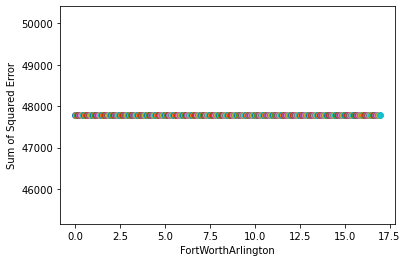

In [3]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df['Group'] = df['AttendancePercent'] >= np.mean(A)
A_ = np.array(df["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C
x1 = A_
x2 = U
x0 = x1*x2

# Guess
a = 1
b = 2
c = 3
d = 4
predicted_y = a*x1 + b*x2 + c*x0 + d
for m in np.arange(0, 17, .05):
    predicted_y = a*x1 + b*x2 + c*x0
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("FortWorthArlington")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(62),x1, x2, x0]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [30]:
#Solve the t value and p value
print(stats.ttest_ind(C,A_))
print(stats.ttest_ind(C,U))

Ttest_indResult(statistic=38.260217194909664, pvalue=8.453165182227344e-70)
Ttest_indResult(statistic=-9.617035938674626, pvalue=1.2259363665375787e-16)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in FortWorthArlington County is plotted.

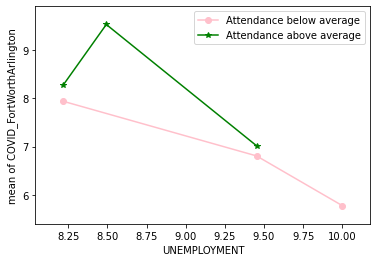

In [4]:
# Interaction Plot with the unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U, A_, C, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_FortWorthArlington')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Irving County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


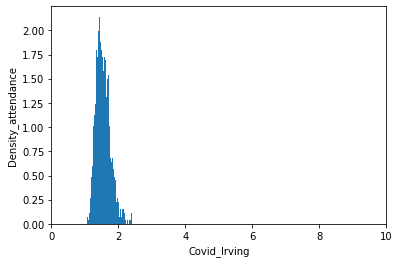

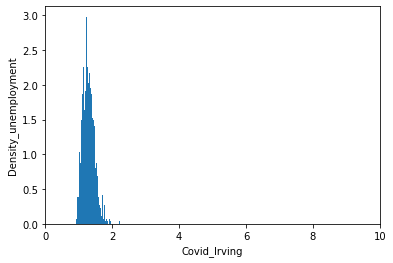

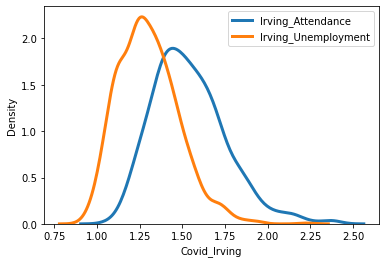

In [5]:
#Read and make arrays of the data in Irving County.
df1 = pd.read_csv("DallasIrving.csv")
data1 = "DallasIrving.csv"
np.genfromtxt(data, delimiter = ",")
df1.rename(columns={'nan':"dat"})

A1 = np.array(df1["AttendancePercent"])
U1 = np.array(df1["Unemployment"])

C1 = np.array(df1["CovidTotalCountyCases"])

samples2 = np.zeros(1000)
samples3 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample5 = random.sample(list(C1),30)
    sample6 = random.sample(list(A1),30)
    samples2[m] = (np.mean(sample6)-np.mean(sample5))/np.sqrt(((np.std(sample5,ddof=29))**2+(np.std(sample6,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample7 = random.sample(list(C1),30)
    sample8 = random.sample(list(U1),30)
    samples3[m] = (np.mean(sample8)-np.mean(sample7))/np.sqrt(((np.std(sample7,ddof=29))**2+(np.std(sample8,ddof=29))**2)/30)

#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples2, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Irving");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples3, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Irving");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples2, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving_Attendance')
sns.distplot(samples3, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving_Unemployment')
plt.xlabel("Covid_Irving")
plt.legend()

In [32]:
#Solve the t value and p value
print(stats.ttest_ind(C1,A1))
print(stats.ttest_ind(C1,U1))

Ttest_indResult(statistic=-11.062089796198187, pvalue=2.257801586788787e-19)
Ttest_indResult(statistic=-9.389618496024116, pvalue=1.3278501537354047e-15)


# How the relationship between the attendance and unemployment with COVID cases is formed in Irving County by distingushing the average of the attendance?

Our intercept is  17.268349831883206 our slope1 -1.0429519549649982 our slope2 -1.0470618193089076 and our slope3 is 0.06367026420382826


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     12.68
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           2.78e-06
Time:                        09:35:55   Log-Likelihood:                -66.825
No. Observations:                  54   AIC:                             141.6
Df Residuals:                      50   BIC:                             149.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.2683      3.248      5.316      0.000      10.744      23.792
x1            -1.0430      4.218     -0.247      0.806      -9.515       7.429
x2            -1.0471      0.364     -2.874      0.006      -1.779      -0.315
x3             0.0637      0.462      0.138      0.891      -0.865       0.992
==============================================================================
Omnibus:                        6.711   Durbin-Watson:                   0.195
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.273
Skew:                           0.832   Prob(JB):                       0.0434
Kurtosis:                       3.141   Cond. No.                         443.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

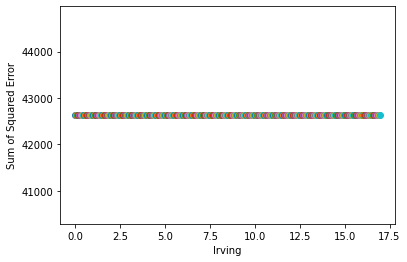

In [6]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df1['Group'] = df1['AttendancePercent'] >= np.mean(A1)
A_1 = np.array(df1["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C1
x3 = A_1
x4 = U1
x01 = x3*x4

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x3 + b*x4 + c*x01
for m in np.arange(0, 17, .05):
    predicted_y = a*x3 + b*x4 + c*x01
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Irving")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(54),x3, x4, x01]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [33]:
#Solve the t value and p value
print(stats.ttest_ind(C1,A_1))
print(stats.ttest_ind(C1,U1))

Ttest_indResult(statistic=42.58445567609112, pvalue=1.7114869598960933e-68)
Ttest_indResult(statistic=-9.389618496024116, pvalue=1.3278501537354047e-15)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Irving County is plotted.

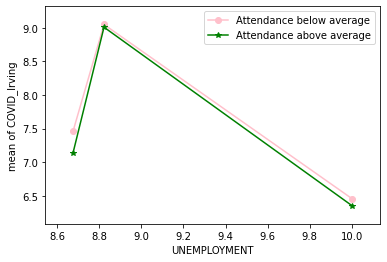

In [7]:
# Interaction Plot with unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U1, A_1, C1, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Irving')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in ElPaso County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


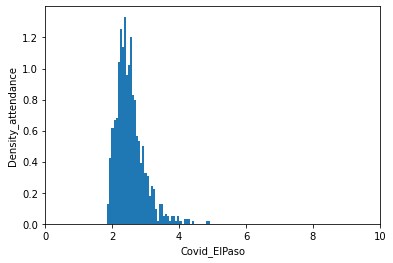

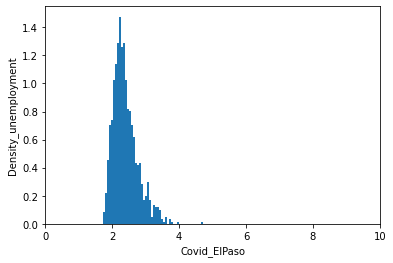

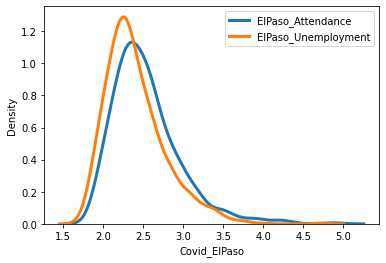

In [8]:
#Read and make arrays of the data in ElPaso County.
df2 = pd.read_csv("ElPaso.csv")
data2 = "ElPaso.csv"
np.genfromtxt(data, delimiter = ",")
df2.rename(columns={'nan':"dat"})

A2 = np.array(df2["AttendancePercent"])
U2 = np.array(df2["Unemployment"])

C2 = np.array(df2["CovidTotalCountyCases"])

samples4 = np.zeros(1000)
samples5 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample9 = random.sample(list(C2),30)
    sample10 = random.sample(list(A2),30)
    samples4[m] = (np.mean(sample10)-np.mean(sample9))/np.sqrt(((np.std(sample9,ddof=29))**2+(np.std(sample10,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample11 = random.sample(list(C2),30)
    sample12 = random.sample(list(U2),30)
    samples5[m] = (np.mean(sample12)-np.mean(sample11))/np.sqrt(((np.std(sample11,ddof=29))**2+(np.std(sample12,ddof=29))**2)/30)

#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples4, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_ElPaso");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples5, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_ElPaso");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples4, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso_Attendance')
sns.distplot(samples5, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso_Unemployment')
plt.xlabel("Covid_ElPaso")
plt.legend()

In [34]:
#Solve the t value and p value
print(stats.ttest_ind(C2,A2))
print(stats.ttest_ind(C2,U2))

Ttest_indResult(statistic=-17.25645426442395, pvalue=3.5115756133523124e-31)
Ttest_indResult(statistic=-16.23450042256635, pvalue=2.802663410189031e-29)


# How the relationship between the attendance and unemployment with COVID cases is formed in ElPaso County by distingushing the average of the attendance?

Our intercept is  18.2516526403174 our slope1 -6.149855290435474 our slope2 -1.4327929928846435 and our slope3 is 0.6613506187332265


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     1.657
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.190
Time:                        09:45:54   Log-Likelihood:                -98.295
No. Observations:                  49   AIC:                             204.6
Df Residuals:                      45   BIC:                             212.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.2517      7.259      2.514      0.016       3.631      32.872
x1            -6.1499      9.447     -0.651      0.518     -25.176      12.877
x2            -1.4328      0.768     -1.865      0.069      -2.981       0.115
x3             0.6614      1.002      0.660      0.512      -1.356       2.679
==============================================================================
Omnibus:                       29.638   Durbin-Watson:                   0.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.118
Skew:                           2.017   Prob(JB):                     1.31e-11
Kurtosis:                       5.876   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

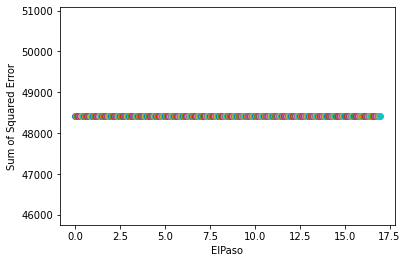

In [47]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df2['Group'] = df2['AttendancePercent'] >= np.mean(A2)
A_2 = np.array(df2["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C2
x5 = A_2
x6 = U2
x02 = x5*x6

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x5 + b*x6 + c*x02
for m in np.arange(0, 17, .05):
    predicted_y = a*x5 + b*x6 + c*x02
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("ElPaso")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(49),x5, x6, x02]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [35]:
#Solve the t value and p value
print(stats.ttest_ind(C2,A_2))
print(stats.ttest_ind(C2,U2))

Ttest_indResult(statistic=15.279779884753001, pvalue=1.8897867536311305e-27)
Ttest_indResult(statistic=-16.23450042256635, pvalue=2.802663410189031e-29)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in ElPaso County is plotted.

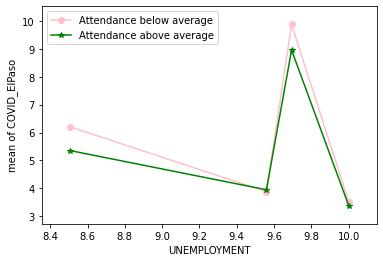

In [10]:
# Interaction Plot with unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U2, A_2, C2, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_ElPaso')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Montogomery County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


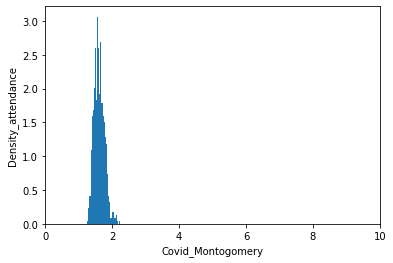

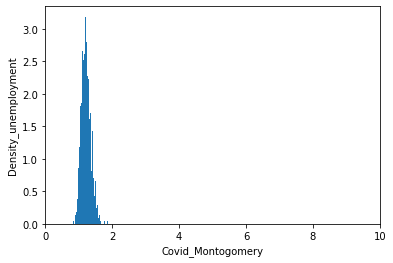

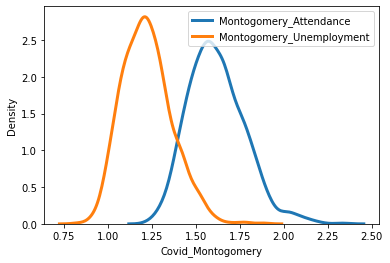

In [11]:
#Read and make arrays of the data in Montogomery County.
df3 = pd.read_csv("Montogomery.csv")
data3 = "Montogomery.csv"
np.genfromtxt(data, delimiter = ",")
df3.rename(columns={'nan':"dat"})

A3 = np.array(df3["AttendancePercent"])
U3 = np.array(df3["Unemployment"])

C3 = np.array(df3["CovidTotalCountyCases"])


samples6 = np.zeros(1000)
samples7 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample13 = random.sample(list(C3),30)
    sample14 = random.sample(list(A3),30)
    samples6[m] = (np.mean(sample14)-np.mean(sample13))/np.sqrt(((np.std(sample13,ddof=29))**2+(np.std(sample14,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample15 = random.sample(list(C3),30)
    sample16 = random.sample(list(U3),30)
    samples7[m] = (np.mean(sample16)-np.mean(sample15))/np.sqrt(((np.std(sample15,ddof=29))**2+(np.std(sample16,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples6, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Montogomery");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples7, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Montogomery");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples6, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery_Attendance')
sns.distplot(samples7, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery_Unemployment')
plt.xlabel("Covid_Montogomery")
plt.legend()

In [36]:
#Solve the t value and p value
print(stats.ttest_ind(C3,A3))
print(stats.ttest_ind(C3,U3))

Ttest_indResult(statistic=-11.448036998552915, pvalue=5.204393605704125e-20)
Ttest_indResult(statistic=-8.645259933990747, pvalue=7.987395319451374e-14)


# How the relationship between the attendance and unemployment with COVID cases is formed in Montogomery County?

Our intercept is  20.70341126845082 our slope1 9.574181243349589 our slope2 -1.3468642263093633 and our slope3 is -1.0547555963361357


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     90.45
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           9.18e-20
Time:                        09:35:57   Log-Likelihood:                -33.791
No. Observations:                  52   AIC:                             75.58
Df Residuals:                      48   BIC:                             83.39
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.7034      1.455     14.227      0.000      17.778      23.629
x1             9.5742      3.118      3.071      0.004       3.305      15.843
x2            -1.3469      0.159     -8.484      0.000      -1.666      -1.028
x3            -1.0548      0.324     -3.257      0.002      -1.706      -0.404
==============================================================================
Omnibus:                        1.191   Durbin-Watson:                   0.785
Prob(Omnibus):                  0.551   Jarque-Bera (JB):                1.029
Skew:                           0.336   Prob(JB):                        0.598
Kurtosis:                       2.851   Cond. No.                         502.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

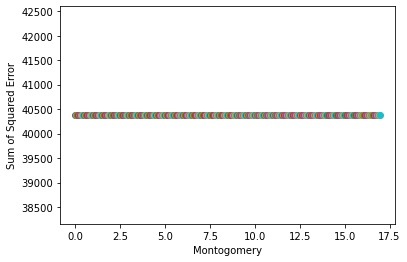

In [12]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df3['Group'] = df3['AttendancePercent'] >= np.mean(A3)
A_3 = np.array(df3["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C3
x7 = A_3
x8 = U3
x03 = x7*x8

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x7 + b*x8 + c*x03
for m in np.arange(0, 17, .05):
    predicted_y = a*x7 + b*x8 + c*x03
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Montogomery")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(52),x7, x8, x03]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [37]:
#Solve the t value and p value
print(stats.ttest_ind(C3,A_3))
print(stats.ttest_ind(C3,U3))

Ttest_indResult(statistic=40.94414609930489, pvalue=3.94427047196386e-65)
Ttest_indResult(statistic=-8.645259933990747, pvalue=7.987395319451374e-14)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Montogomery County is plotted.

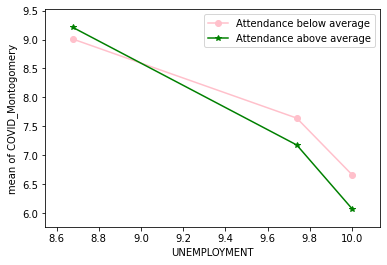

In [13]:
# Interaction Plot with unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U3, A_3, C3, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Montogomery')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Tarrant County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


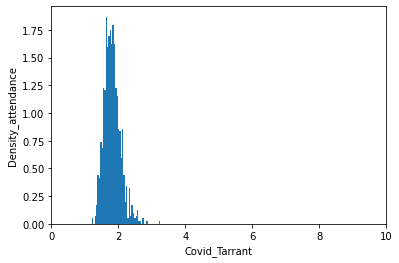

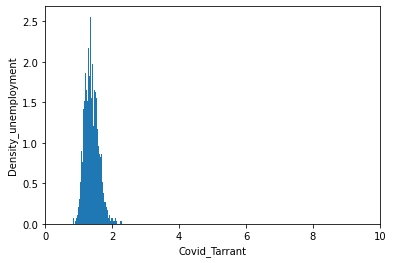

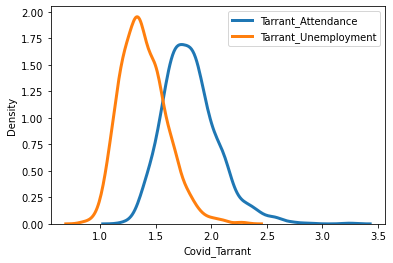

In [14]:
#Read and make arrays of the data in Tarrant County.
df4 = pd.read_csv("Tarrant.csv")
data4 = "Tarrant.csv"
np.genfromtxt(data, delimiter = ",")
df4.rename(columns={'nan':"dat"})

A4 = np.array(df4["AttendancePercent"])
U4 = np.array(df4["Unemployment"])

C4 = np.array(df4["CovidTotalCountyCases"])


samples8 = np.zeros(1000)
samples9 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample17 = random.sample(list(C4),30)
    sample18 = random.sample(list(A4),30)
    samples8[m] = (np.mean(sample18)-np.mean(sample17))/np.sqrt(((np.std(sample17,ddof=29))**2+(np.std(sample18,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample19 = random.sample(list(C4),30)
    sample20 = random.sample(list(U4),30)
    samples9[m] = (np.mean(sample20)-np.mean(sample19))/np.sqrt(((np.std(sample19,ddof=29))**2+(np.std(sample20,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples8, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Tarrant");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples9, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Tarrant");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples8, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant_Attendance')
sns.distplot(samples9, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant_Unemployment')
plt.xlabel("Covid_Tarrant")
plt.legend()

In [38]:
#Solve the t value and p value
print(stats.ttest_ind(C4,A4))
print(stats.ttest_ind(C4,U4))

Ttest_indResult(statistic=-14.016133550827963, pvalue=2.473413712191601e-27)
Ttest_indResult(statistic=-10.74574674039797, pvalue=1.9389711990321969e-19)


# How the relationship between the attendance and unemployment with COVID cases is formed in Tarrant County?

Our intercept is  18.865504639220042 our slope1 4.101075466041198 our slope2 -1.3245730549760812 and our slope3 is -0.5031721451687474


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     46.83
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.29e-15
Time:                        09:35:58   Log-Likelihood:                -78.506
No. Observations:                  63   AIC:                             165.0
Df Residuals:                      59   BIC:                             173.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.8655      2.382      7.921      0.000      14.099      23.632
x1             4.1011      4.254      0.964      0.339      -4.411      12.613
x2            -1.3246      0.278     -4.762      0.000      -1.881      -0.768
x3            -0.5032      0.460     -1.094      0.278      -1.423       0.417
==============================================================================
Omnibus:                        7.064   Durbin-Watson:                   0.113
Prob(Omnibus):                  0.029   Jarque-Bera (JB):                6.217
Skew:                           0.693   Prob(JB):                       0.0447
Kurtosis:                       3.668   Cond. No.                         424.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

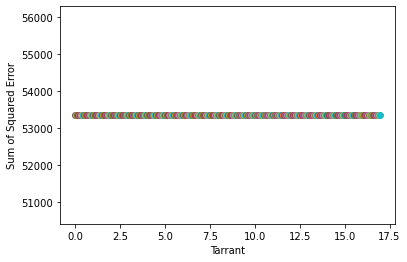

In [15]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df4['Group'] = df4['AttendancePercent'] >= np.mean(A4)
A_4 = np.array(df4["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C4
x9 = A_4
x10 = U4
x04 = x9*x10

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x9 + b*x10 + c*x04
for m in np.arange(0, 17, .05):
    predicted_y = a*x9 + b*x10 + c*x04
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Tarrant")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(63),x9, x10, x04]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [39]:
#Solve the t value and p value
print(stats.ttest_ind(C4,A_4))
print(stats.ttest_ind(C4,U4))

Ttest_indResult(statistic=30.290826968098738, pvalue=3.7826836488293712e-59)
Ttest_indResult(statistic=-10.74574674039797, pvalue=1.9389711990321969e-19)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Tarrant County is plotted.

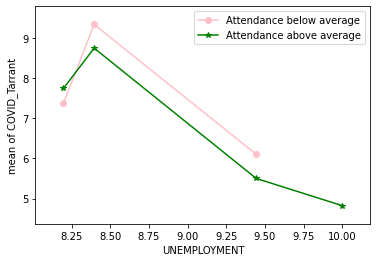

In [16]:
# Interaction Plot with unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U4, A_4, C4, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Tarrant')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Floyd County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


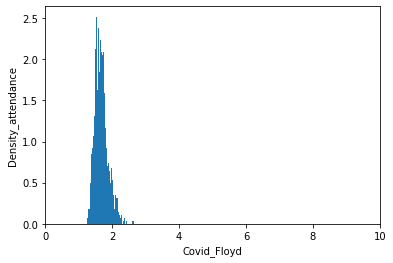

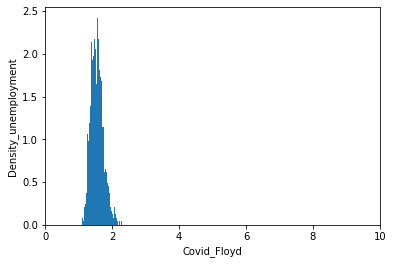

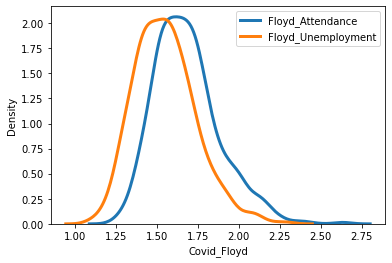

In [17]:
#Read and make arrays of the data in Floyd County.
df5 = pd.read_csv("Floyd.csv")
data5 = "Floyd.csv"
np.genfromtxt(data, delimiter = ",")
df5.rename(columns={'nan':"dat"})

A5 = np.array(df5["AttendancePercent"])
U5 = np.array(df5["Unemployment"])

C5 = np.array(df5["CovidTotalCountyCases"])


samples10 = np.zeros(1000)
samples11 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample21 = random.sample(list(C5),30)
    sample22 = random.sample(list(A5),30)
    samples10[m] = (np.mean(sample22)-np.mean(sample21))/np.sqrt(((np.std(sample21,ddof=29))**2+(np.std(sample22,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample23 = random.sample(list(C5),30)
    sample24 = random.sample(list(U5),30)
    samples11[m] = (np.mean(sample24)-np.mean(sample23))/np.sqrt(((np.std(sample23,ddof=29))**2+(np.std(sample24,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples10, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Floyd");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples11, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Floyd");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples10, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd_Attendance')
sns.distplot(samples11, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd_Unemployment')
plt.xlabel("Covid_Floyd")
plt.legend()

In [40]:
#Solve the t value and p value
print(stats.ttest_ind(C5,A5))
print(stats.ttest_ind(C5,U5))

Ttest_indResult(statistic=-12.38711790821475, pvalue=1.0154677408135979e-22)
Ttest_indResult(statistic=-11.458794058432229, pvalue=1.3770842812803258e-20)


# How the relationship between the attendance and unemployment with COVID cases is formed in Floyd County?

Our intercept is  21.839954977655786 our slope1 8.399598751637237 our slope2 -1.6225134547007396 and our slope3 is -0.9223332893736071


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.426
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     13.12
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.60e-06
Time:                        09:35:59   Log-Likelihood:                -95.981
No. Observations:                  57   AIC:                             200.0
Df Residuals:                      53   BIC:                             208.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.8400      4.841      4.512      0.000      12.131      31.549
x1             8.3996      7.286      1.153      0.254      -6.214      23.013
x2            -1.6225      0.536     -3.025      0.004      -2.698      -0.547
x3            -0.9223      0.784     -1.176      0.245      -2.496       0.651
==============================================================================
Omnibus:                       32.329   Durbin-Watson:                   0.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.289
Skew:                           1.929   Prob(JB):                     8.10e-14
Kurtosis:                       6.241   Cond. No.                         512.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

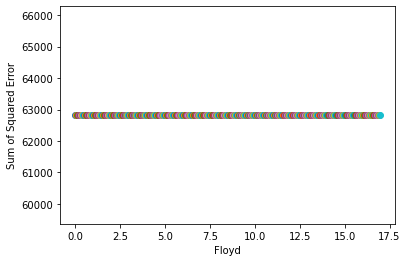

In [18]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df5['Group'] = df5['AttendancePercent'] >= np.mean(A5)
A_5 = np.array(df5["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C5
x11 = A_5
x12 = U5
x05 = x11*x12

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x11 + b*x12 + c*x05
for m in np.arange(0, 17, .05):
    predicted_y = a*x11 + b*x12 + c*x05
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Floyd")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(57),x11, x12, x05]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [41]:
#Solve the t value and p value
print(stats.ttest_ind(C5,A_5))
print(stats.ttest_ind(C5,U5))

Ttest_indResult(statistic=24.941216574360826, pvalue=1.53719089049291e-47)
Ttest_indResult(statistic=-11.458794058432229, pvalue=1.3770842812803258e-20)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Floyd County is plotted.

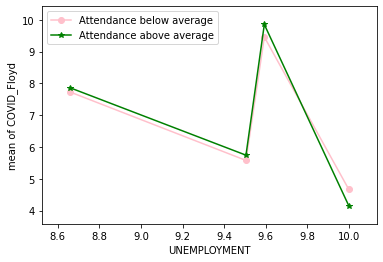

In [19]:
# Interaction Plot with unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U5, A_5, C5, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Floyd')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Burleson County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


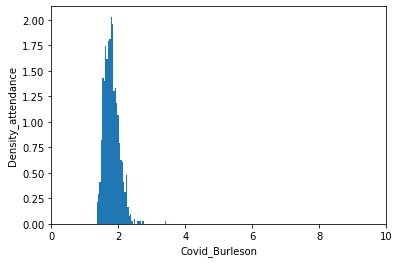

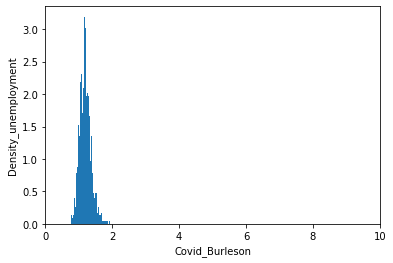

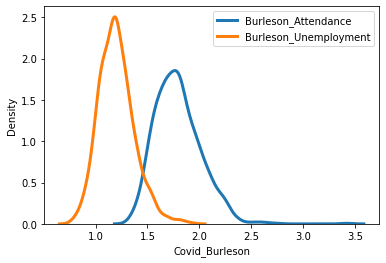

In [20]:
#Read and make arrays of the data in Burleson County.
df6 = pd.read_csv("Burleson.csv")
data6 = "Burleson.csv"
np.genfromtxt(data, delimiter = ",")
df6.rename(columns={'nan':"dat"})

A6 = np.array(df6["AttendancePercent"])
U6 = np.array(df6["Unemployment"])

C6 = np.array(df6["CovidTotalCountyCases"])


samples12 = np.zeros(1000)
samples13 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample25 = random.sample(list(C6),30)
    sample26 = random.sample(list(A6),30)
    samples12[m] = (np.mean(sample26)-np.mean(sample25))/np.sqrt(((np.std(sample25,ddof=29))**2+(np.std(sample26,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample27 = random.sample(list(C6),30)
    sample28 = random.sample(list(U6),30)
    samples13[m] = (np.mean(sample28)-np.mean(sample27))/np.sqrt(((np.std(sample27,ddof=29))**2+(np.std(sample28,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples12, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Burleson");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples13, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Burleson");plt.xlim(0,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples12, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson_Attendance')
sns.distplot(samples13, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson_Unemployment')
plt.xlabel("Covid_Burleson")
plt.legend()

In [42]:
#Solve the t value and p value
print(stats.ttest_ind(C6,A6))
print(stats.ttest_ind(C6,U6))

Ttest_indResult(statistic=-13.065142421027621, pvalue=4.066655364870569e-24)
Ttest_indResult(statistic=-8.7943980723565, pvalue=2.2322888623673855e-14)


# How the relationship between the attendance and unemployment with COVID cases is formed in Burleson County?

Our intercept is  22.276600543257963 our slope1 -0.17241742676215566 our slope2 -1.6476024886163225 and our slope3 is 0.02738503048095975


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     28.96
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.76e-11
Time:                        09:36:00   Log-Likelihood:                -71.907
No. Observations:                  56   AIC:                             151.8
Df Residuals:                      52   BIC:                             159.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.2766      2.694      8.268      0.000      16.870      27.683
x1            -0.1724      3.423     -0.050      0.960      -7.041       6.696
x2            -1.6476      0.288     -5.716      0.000      -2.226      -1.069
x3             0.0274      0.371      0.074      0.941      -0.717       0.772
==============================================================================
Omnibus:                        7.318   Durbin-Watson:                   0.155
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                6.396
Skew:                           0.752   Prob(JB):                       0.0409
Kurtosis:                       3.690   Cond. No.                         371.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

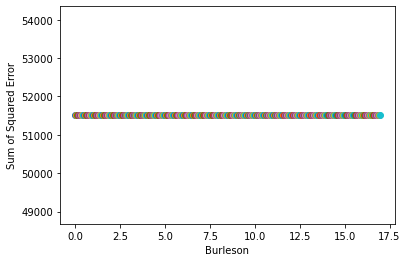

In [21]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df6['Group'] = df6['AttendancePercent'] >= np.mean(A6)
A_6 = np.array(df6["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C6
x13 = A_6
x14 = U6
x06 = x13*x14

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x13 + b*x14 + c*x06
for m in np.arange(0, 17, .05):
    predicted_y = a*x13 + b*x14 + c*x06
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Burleson")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(56),x13, x14, x06]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [43]:
#Solve the t value and p value
print(stats.ttest_ind(C6,A_6))
print(stats.ttest_ind(C6,U6))

Ttest_indResult(statistic=32.82253239856127, pvalue=1.1922581632286571e-58)
Ttest_indResult(statistic=-8.7943980723565, pvalue=2.2322888623673855e-14)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Burleson County is plotted.

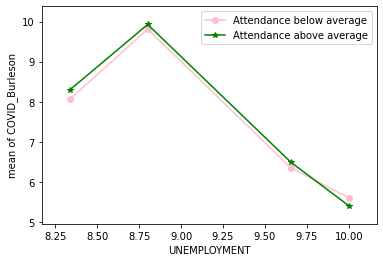

In [22]:
# Interaction Plot with the unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U6, A_6, C6, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Burleson')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# How the attendance and unemployment distributed in Harris County?

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


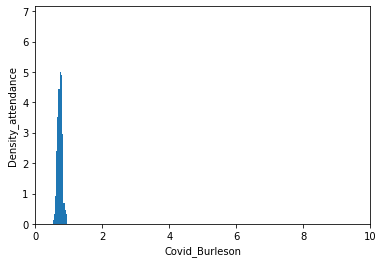

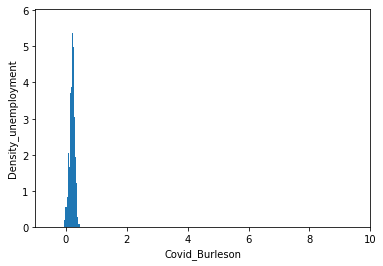

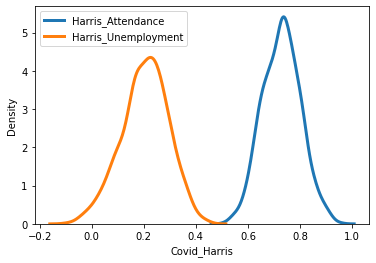

In [23]:
#Read and make arrays of the data in Harris County.
df7 = pd.read_csv("Harris.csv")
data7 = "Harris.csv"
np.genfromtxt(data, delimiter = ",")
df7.rename(columns={'nan':"dat"})

A7 = np.array(df7["AttendancePercent"])
U7 = np.array(df7["Unemployment"])

C7 = np.array(df7["CovidTotalCountyCases"])


samples14 = np.zeros(1000)
samples15 = np.zeros(1000)

#2t test with covid cases and the attendance with 30 random samples.
for m in np.arange(0,1000,1):
    sample29 = random.sample(list(C7),30)
    sample30 = random.sample(list(A7),30)
    samples14[m] = (np.mean(sample30)-np.mean(sample29))/np.sqrt(((np.std(sample29,ddof=29))**2+(np.std(sample30,ddof=29))**2)/30)

#2t test with covid cases and and the unemployment with 30 random samples.
for m in np.arange(0,1000,1):
    sample31 = random.sample(list(C7),30)
    sample32 = random.sample(list(U7),30)
    samples15[m] = (np.mean(sample32)-np.mean(sample31))/np.sqrt(((np.std(sample31,ddof=29))**2+(np.std(sample32,ddof=29))**2)/30)


#Plot 2t test with covid cases and the attendance.
plt.subplot()
plt.hist(samples14, density = True, bins = 50)
x = np.linspace(-1000,1000,100)
plt.xlabel("Covid_Burleson");plt.xlim(0,10)
plt.ylabel("Density_attendance")

#Plot 2t test with covid cases and the unemployment.
plt.subplots()
plt.hist(samples15, density = True, bins = 50)
x = np.linspace(-100,100,100)
plt.xlabel("Covid_Burleson");plt.xlim(-1,10)
plt.ylabel("Density_unemployment")

#Combine 2 plotted distributions.
import seaborn as sns
plt.subplots()
sns.distplot(samples14, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris_Attendance')
sns.distplot(samples15, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris_Unemployment')
plt.xlabel("Covid_Harris")
plt.legend()

In [44]:
#Solve the t value and p value
print(stats.ttest_ind(C7,A7))
print(stats.ttest_ind(C7,U7))

Ttest_indResult(statistic=-4.529380052488704, pvalue=2.0969837841783113e-05)
Ttest_indResult(statistic=-1.28226384034483, pvalue=0.20354800792211558)


# How the relationship between the attendance and unemployment with COVID cases is formed in Harris County?

Our intercept is  13.899664676621903 our slope1 5.983805490598275 our slope2 -0.5378918121522183 and our slope3 is -0.6969001724031036


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     44.33
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.56e-12
Time:                        09:36:01   Log-Likelihood:                -24.300
No. Observations:                  40   AIC:                             56.60
Df Residuals:                      36   BIC:                             63.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.8997      1.397      9.953      0.000      11.067      16.732
x1             5.9838      1.910      3.133      0.003       2.110       9.857
x2            -0.5379      0.160     -3.355      0.002      -0.863      -0.213
x3            -0.6969      0.212     -3.294      0.002      -1.126      -0.268
==============================================================================
Omnibus:                        7.256   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.027   Jarque-Bera (JB):                5.944
Skew:                           0.853   Prob(JB):                       0.0512
Kurtosis:                       3.812   Cond. No.                         317.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

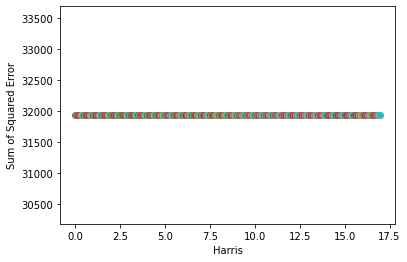

In [24]:
#Distinguish the attendacne percentage below and above average due to high attendance.
df7['Group'] = df7['AttendancePercent'] >= np.mean(A7)
A_7 = np.array(df7["Group"])

#plot the covidcases = a*aboveaverageattendance + b*unemployment+ c*(aboveaverageattendance*unemployment).
y = C7
x15 = A_7
x16 = U7
x07 = x15*x16

# Guess
a = 1
b = 2
c = 3
predicted_y = a*x15 + b*x16 + c*x07
for m in np.arange(0, 17, .05):
    predicted_y = a*x15 + b*x16 + c*x07
    err = predicted_y - y
    SSE = np.sum( err**2 )
    plt.plot(m, SSE, 'o')
plt.xlabel("Harris")
plt.ylabel("Sum of Squared Error")
    
# Matrix
X = np.c_[np.ones(40),x15, x16, x07]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X))

#solve the INTERCEPT, SLOPE1, SLOPE2 and SLOPE3 and analyze the graph.
INTERCEPT, SLOPE1, SLOPE2, SLOPE3 = tmp @ np.transpose(X) @ y
print("Our intercept is ",INTERCEPT, "our slope1", SLOPE1, "our slope2", SLOPE2, "and our slope3 is", SLOPE3)
import statsmodels.api as sm

model = sm.OLS(y,X).fit()
model.summary()

In [45]:
#Solve the t value and p value
print(stats.ttest_ind(C7,A_7))
print(stats.ttest_ind(C7,U7))

Ttest_indResult(statistic=47.788477432134684, pvalue=1.5749135717687242e-59)
Ttest_indResult(statistic=-1.28226384034483, pvalue=0.20354800792211558)


# With distingushing the average of the attendance, the relationship with unemployment and COVID cases in Harris County is plotted.

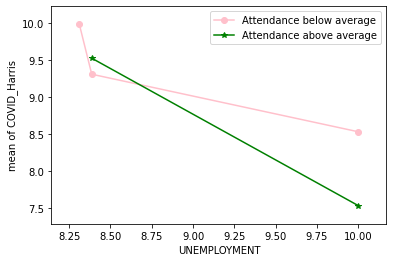

In [25]:
# Interaction Plot with the unemployment and covid cases depending on the attendance.
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(U7, A_7, C7, colors = ['pink', 'green'], markers = ['o', '*'], xlabel = 'UNEMPLOYMENT', ylabel = 'COVID_Harris')
plt.legend(['Attendance below average', 'Attendance above average'])
plt.show()

# Comparing t attendance distribution with various counties.

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

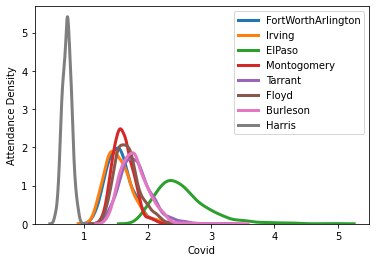

In [26]:
#Plot t distribution of attendance percentages and covid cases with all counties.
import seaborn as sns
plt.subplots()
sns.distplot(samples, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington')
sns.distplot(samples2, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving')
sns.distplot(samples4, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso')
sns.distplot(samples6, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery')
sns.distplot(samples8, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant')
sns.distplot(samples10, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd')
sns.distplot(samples12, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson')
sns.distplot(samples14, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris')

plt.xlabel("Covid")
plt.ylabel("Attendance Density")
plt.legend()

# Comparing t unemployment distribution with various counties.

/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/loah/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function w

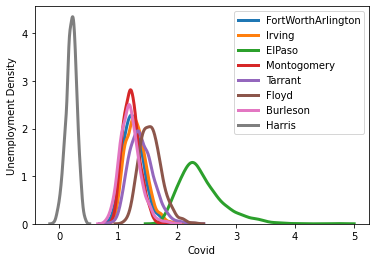

In [27]:
#Plot t distribution of unemployment rates and covid cases with all counties.
import seaborn as sns
plt.subplots()
sns.distplot(samples1, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'FortWorthArlington')
sns.distplot(samples3, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Irving')
sns.distplot(samples5, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'ElPaso')
sns.distplot(samples7, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Montogomery')
sns.distplot(samples9, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Tarrant')
sns.distplot(samples11, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Floyd')
sns.distplot(samples13, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Burleson')
sns.distplot(samples15, hist= False, kde = True, kde_kws = {'linewidth' : 3}, label = 'Harris')

plt.xlabel("Covid")
plt.ylabel("Unemployment Density")
plt.legend()